In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data['Experience_Level'] = data['Experience_Level'].astype(str)
data['Workout_Frequency (days/week)'] = data['Workout_Frequency (days/week)'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    obj

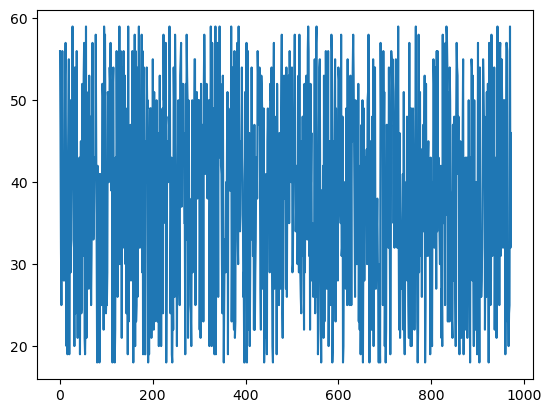

In [ ]:
plt.plot(data['Age'])

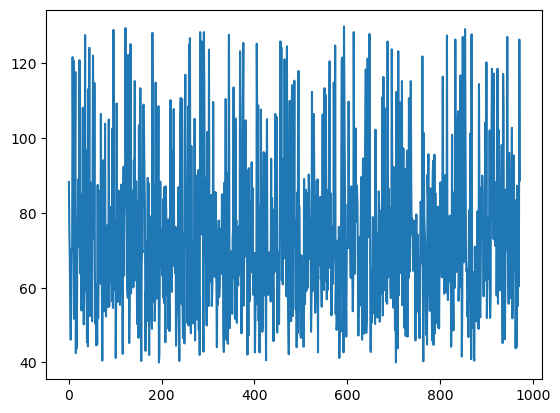

In [15]:
plt.plot(data['Weight (kg)'])